In [3]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from sklearn.metrics import r2_score
import csv
from io import StringIO
import missingno as msno
import io
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('PDF')
#from StringIO import StringIO
from sklearn import cross_validation,linear_model, metrics, pipeline, preprocessing
from sklearn.preprocessing import FunctionTransformer
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler  
import calendar

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


155
0.713688244563 342.212980762 324.370774648
    SENSOR_ID                   SENSOR_NAVN   LATITUDE  LONGITUDE  \
40     300074             RS Ullevål sykkel  6653556.0  261771.27   
41     300076        RS Aker sykehus sykkel  6652306.0  265408.90   
42     300077       RS Frognerstanda sykkel  6649469.0  259745.50   
55     300149                   Bryn sykkel  6647886.5  266132.10   
65     300170  RS Kong Haakon 5’gate sykkel  6648531.0  263039.06   

           STREKNING_NAVN   FORMAT SENSOR_STATUS SENSOR_TYPE    OPPLOSNING  \
40  RV150 HP 1 Meter 6766  Datainn            OK      Sykkel  Enkeltkjøret   
41    RV4 HP 3 Meter 2400  Datainn            OK      Sykkel  Enkeltkjøret   
42   EV18 HP 2 Meter 4155  Datainn            OK      Sykkel  Enkeltkjøret   
55    EG6 HP1 Meter 10440  Datainn            OK      Sykkel  Enkeltkjøret   
65   RG162 HP 1 Meter 880  Datainn            OK      Sykkel  Enkeltkjøret   

           DTC  
40  336.312582  
41  332.638785  
42  338.232135  
5

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


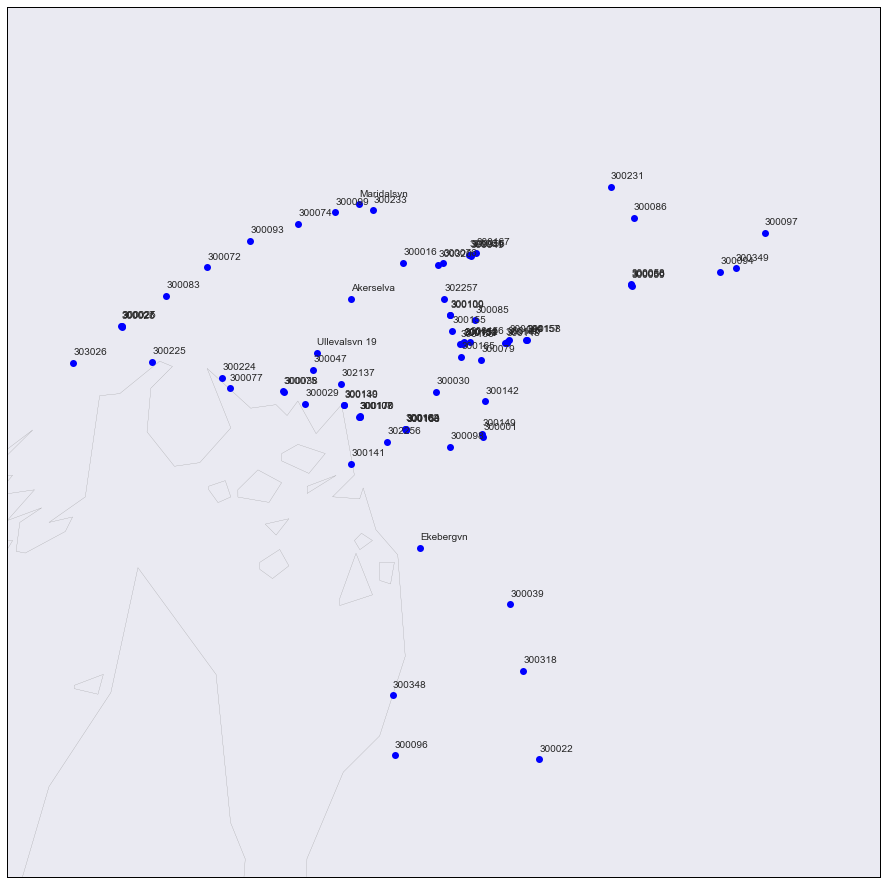

[10000010 10000030 10000060 10000090 10000120 10000150 10000180 10000210
 10000240 10000270 10000300 10000330 10000360 10000390 10000420 10000450
 10000480 10000510 10000540 10000550 10000570 10000590 10000600 10000610
 10000640 10000670 10000700 10000730 10000760 10000790 10000820 10000850
 10000880 10000910 10000940 10000970 10001000]
   SENSOR_ID                TIME  LANE  SUM        DTC
0   10000010 2015-02-01 00:00:00  99.0  5.0  43.631375
1   10000010 2015-02-01 01:00:00  99.0  2.0  43.631375
2   10000010 2015-02-01 02:00:00  99.0  6.0  43.631375
3   10000010 2015-02-01 03:00:00  99.0  5.0  43.631375
4   10000010 2015-02-01 04:00:00  99.0  4.0  43.631375
Rows in cycling data combined with met  88345
Rows in car data combined with met  101661
Station id  300016
Station id  300099
Station id  300233
Station id  302257
Station id  300083
Rows in cycling data combined with met  78840 101661 0 101661
(101661, 13)
(78840, 13)


In [4]:
%run Cycle_Car_preprocess.ipynb

In [5]:
del cycle_met_clean_data['WEEKDAY']
del cycle_met_clean_data['MONTH']
cycle_met_clean_data['WEEKDAY'] = cycle_met_clean_data['TIME'].dt.weekday #weekday_name#Insert a column with weekday name
cycle_met_clean_data['MONTH'] = cycle_met_clean_data['TIME'].dt.month
cycle_met_clean_data.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SENSOR_ID,TIME,LANE,SUM,DTC,STATION_ID,WIND_MAG,TEMP,PPT,RH,HOUR,WEEKDAY,MONTH
1,10000210,2015-02-01 01:00:00,0.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
2,10000210,2015-02-01 01:00:00,1.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
3,10000210,2015-02-01 01:00:00,2.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
4,10000480,2015-02-01 01:00:00,0.0,1.0,41.585130,18700,5.8,-1.0,0.0,75,1,6,2
5,10000480,2015-02-01 01:00:00,1.0,0.0,41.585130,18700,5.8,-1.0,0.0,75,1,6,2


In [6]:
car_met_clean_sensor_location['WEEKDAY'] = car_met_clean_sensor_location['TIME'].dt.weekday #weekday_name#Insert a column with weekday name
car_met_clean_sensor_location['MONTH'] = car_met_clean_sensor_location['TIME'].dt.month
car_met_clean_sensor_location.head()

,SENSOR_ID,DIRECTION,SUM,TIME,STATION_ID,WIND_MAG,TEMP,PPT,RH,WEEKDAY,MONTH,HOUR,DTC
0,300016,1,284,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,2,1,333.665928
1,300016,2,317,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,2,1,333.665928
2,300016,1,165,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,2,2,333.665928
3,300016,2,216,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,2,2,333.665928
4,300016,1,98,2015-02-01 03:00:00,18700,6.5,-1.5,0.1,79,6,2,3,333.665928


In [7]:
#Visualizing and Manipulating/Creating columns of dataframe
#S300099['temp_F']=S300099.TempC*1.8+32  ###Adds a column by using another column
#S300099.rename(columns={'SUM':'total'},inplace=1) ##Renames
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
#S300099['temp_cut']=pd.cut(S300099.TempC,[-15,0,15,30])  
#plt.rcParams['figure.figsize']=(14,12)
#plt.rcParams['font.size']=14
#sns.set_style("whitegrid")
#g=sns.swarmplot(x='HOUR',y='SUM',hue='temp_cut',data=S300099)
#g.set(xlabel="Hour within a Day", ylabel="Number of Cars on Road")
#del S300099['temp_cut']

#Data viewing
#S300099.head()
#S300099.tail(3)
#S300099.describe()
#S300099.index
#S300099.columns

#Data sorting by index and by label
#S300099.sort_index(axis=1, ascending=False)
#S300099.sort_values(by='STARTHOUR')
#S300099.T

#Dataframe copying
#df=S300099.copy()

#df[['B', 'A']] = df[['A', 'B']] # cOLUMN NAME IS SAME BUT COLUMN VALUES INTERCHANGED
#dfa['A'] = list(range(len(dfa.index)))   #Create A
#dfa.A = list(range(len(dfa.index)))   #If A already exists

#Slicing - Selecting by label and Selecting by location
#df.iloc[:, 1:3]
#df[:3]
#df.where(df < 0, -df)

#Missing data
#df1.dropna(how='any')
#df1.fillna(value=5)

#Functions
#df.apply(np.mean, axis=1)
#df.apply(lambda x: x.max() - x.min())
#df.apply(np.exp)
#df.apply(np.cumsum)




**INFORMATION ABOUT DATA**
Assessing column - Generally, you can access a column of the DataFrame through indexing using the [] operator (e.g. df['col']), or through attribute (e.g. df.col). Attribute accessing makes the code a bit more concise when the target column name is known beforehand, but has several caveats -- for example, it does not work when the column name is not a valid Python identifier (e.g. df.123), or clashes with the built-in DataFrame attribute (e.g. df.index). On the other hand, the [] notation should always work.

In [8]:
car_met_clean_sensor_location.dtypes

car_met_clean_sensor_location.shape

#column_list = car_met_clean_sensor_location.columns.values.tolist()
#for column_name in column_list:
#    print (car_met_clean_sensor_location[column_name].unique())
    
    
#msno.matrix(S300099,figsize=(12,5))
#corr = S300099.corr()
#sns.heatmap(corr, 
 #           xticklabels=corr.columns.values,
#          yticklabels=corr.columns.values)
#plt.figure()
#plt.ylabel('SUM')
#S300099.groupby('TIME').size().plot(x='TIME',y='SUM',kind = 'bar',figsize = (14,4))

(101661, 13)

Feature Selection methods if required
http://scikit-learn.org/stable/modules/feature_selection.html

In [9]:
S300099=car_met_clean_sensor_location.copy()
S300099.head()

,SENSOR_ID,DIRECTION,SUM,TIME,STATION_ID,WIND_MAG,TEMP,PPT,RH,WEEKDAY,MONTH,HOUR,DTC
0,300016,1,284,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,2,1,333.665928
1,300016,2,317,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,2,1,333.665928
2,300016,1,165,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,2,2,333.665928
3,300016,2,216,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,2,2,333.665928
4,300016,1,98,2015-02-01 03:00:00,18700,6.5,-1.5,0.1,79,6,2,3,333.665928


## Feature Engineering## 
Divide into category variables are qualitative or distinctly sub-divided into categories . (Nominal - no order and no comparison. Ordinal - Ranked and compared . Dichotomous or Binary with Yes and No) , and Continuouse variables are quantitative (). Cyclic variables (hour of day 23 and 0, weekday - sunday to monday) and Non-Cyclic variables.  

In [10]:
X2 = S300099.ix[:,S300099.columns != 'SUM']
y2 = S300099.ix[:,S300099.columns == 'SUM']
## convert to matrices 
X2 = np.matrix(X2.values)
y2 = np.array(y2.values)
print(S300099.shape)

#S300099=S300099.ix[:,S300099.columns != 'AVGSPEED']

print(S300099.head())
print('before', S300099.shape)
S300099['xHOUR']= np.sin(2*np.pi*S300099['HOUR']/24)
S300099['yHOUR']= np.cos(2*np.pi*S300099['HOUR']/24)
S300099['xdirection']= np.sin(np.pi*S300099['DIRECTION']/180)
S300099['ydirection']= np.cos(np.pi*S300099['DIRECTION']/180)
S300099=S300099.rename(index=str, columns={"TEMP": "TempC", "PPT": "Pptmm","RH": "Humidpercen","WIND_MAG": "WINDSPEED"})
print(S300099.head())
#hour remove from above
#', 'DirectionDeg',



#Data Classification

#binary_data_columns = ['holiday', 'workingday']
#binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

#categorical_data_columns = ['season', 'weather', 'month'] 
#categorical_data_columns = ['WEEKDAY'] 

S3000991=S300099.copy()
S300099.drop(['SENSOR_ID','DIRECTION','SUM','TIME','STATION_ID','DIRECTION','HOUR'],inplace=True,axis = 1) #'HOUR',

categorical_data_columns = ['MONTH','WEEKDAY'] 
categorical_data_indices = np.array([(column in categorical_data_columns) for column in S300099.columns], dtype = bool)
#S300099.drop(categorical_data_columns,inplace=True, axis = 1)
print('categoricaldata',categorical_data_indices)

numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED','DTC','xHOUR','yHOUR','xdirection','ydirection']
print('after', S300099.shape)

#numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in S300099.columns], dtype = bool)
print('numericdata',numeric_data_indices)
#['xHOUR','yHOUR','xdirection','ydirection','TempC','Pptmm','Humidpercen','AVGSPEED']

transformer_list = [        
            #binary
            #('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
          ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                     ])),
        ]



(101661, 13)
   SENSOR_ID  DIRECTION  SUM                TIME  STATION_ID  WIND_MAG  TEMP  \
0     300016          1  284 2015-02-01 01:00:00       18700       5.8  -1.0   
1     300016          2  317 2015-02-01 01:00:00       18700       5.8  -1.0   
2     300016          1  165 2015-02-01 02:00:00       18700       6.2  -1.3   
3     300016          2  216 2015-02-01 02:00:00       18700       6.2  -1.3   
4     300016          1   98 2015-02-01 03:00:00       18700       6.5  -1.5   

   PPT  RH  WEEKDAY  MONTH  HOUR         DTC  
0  0.0  75        6      2     1  333.665928  
1  0.0  75        6      2     1  333.665928  
2  0.0  77        6      2     2  333.665928  
3  0.0  77        6      2     2  333.665928  
4  0.1  79        6      2     3  333.665928  
before (101661, 13)
   SENSOR_ID  DIRECTION  SUM                TIME  STATION_ID  WINDSPEED  \
0     300016          1  284 2015-02-01 01:00:00       18700        5.8   
1     300016          2  317 2015-02-01 01:00:00      

count=0
for var in categorical_data_indices:
    if var==True:
        S300099[count] = S300099[count].astype("category")
        count0count+1
    
dataTypeDf = pd.DataFrame(S300099.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")    

## Correlation Analysis

One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

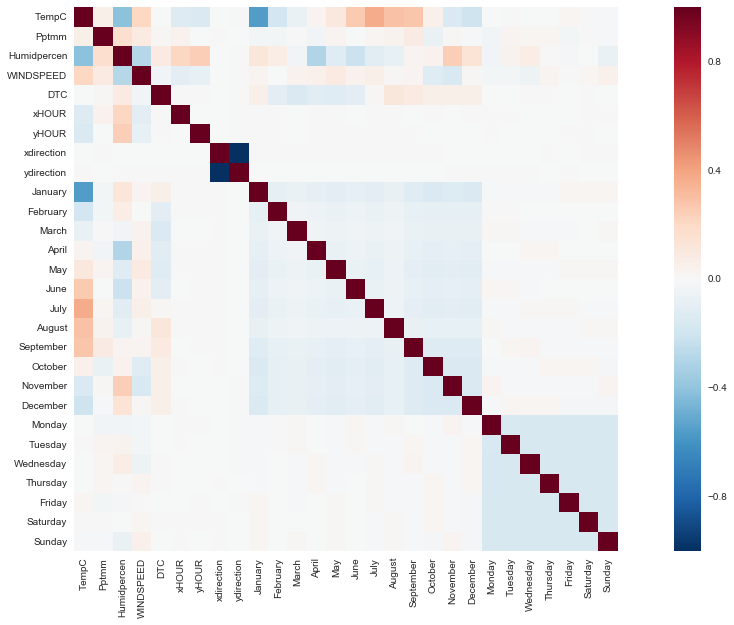

In [11]:
#print(S300099['WEEKDAY'].unique())
#print(S300099['MONTH'].unique())
df_dummies1 = pd.get_dummies(S300099[categorical_data_columns[0]])
df_dummies1.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_dummies2 = pd.get_dummies(S300099[categorical_data_columns[1]])
df_dummies2.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#print(S300099[categorical_data_columns])
#print(S300099.head())
#print(S300099[numeric_data_columns])

#del df_dummies[df_dummies.columns[-1]]
#print('Dummies',df_dummies.head())
df_new = pd.concat([S300099[numeric_data_columns], df_dummies1, df_dummies2 ], axis=1)
#print('New',df_new)
#del df_new[categorical_data_columns]
corrMatt = df_new.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, vmax=.8, square=True)
fig.savefig('Correlations.pdf',bbox_inches='tight')

## Visualizing Distribution Of Data
As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


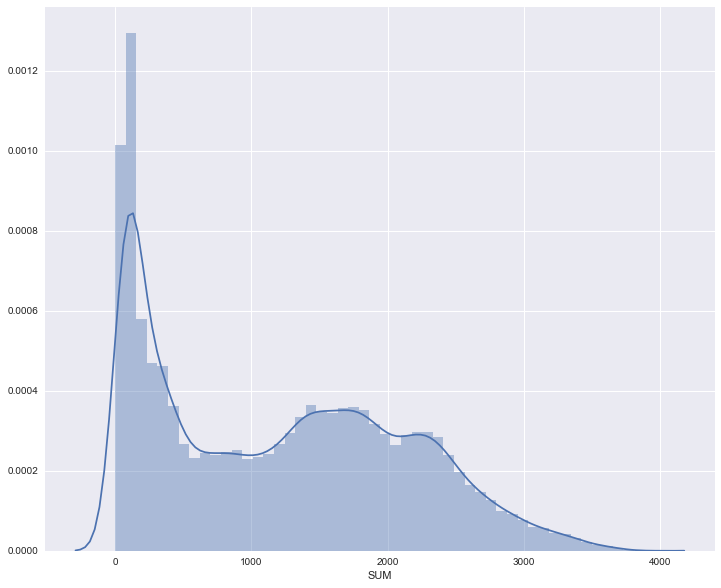

In [12]:
fig,axes = plt.subplots(ncols=1,nrows=1)
fig.set_size_inches(12, 10)
sns.distplot(S3000991["SUM"])#ax=axes[0]
fig.savefig('Distribution.pdf',bbox_inches='tight')
#stats.probplot(S300099["SUM"], dist='norm', fit=True, plot=axes[0][1])
#sns.distplot(np.log(S300099["SUM"]),ax=axes[1])
#stats.probplot(np.log1p(S300099["SUM"]), dist='norm', fit=True, plot=axes[1][1])

# Visualizing Count Vs Independent variables

In [13]:
def violinplot(data_in,key,target,xlabel,ylabel,title,out_file):
    col_order = np.sort(data_in[key].unique()).tolist()
    plt.figure(figsize=(16,6))
    sns.violinplot(x=key, y=target, data=data_in, order=col_order)
    #plt.ylim([-100,1000])
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=15)
    #plt.show()
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()

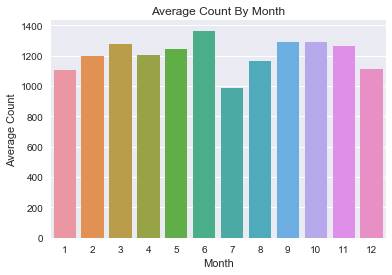

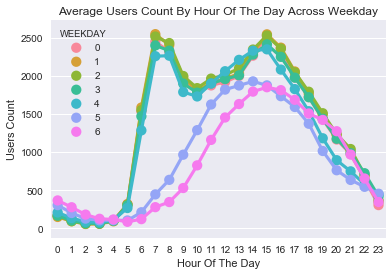

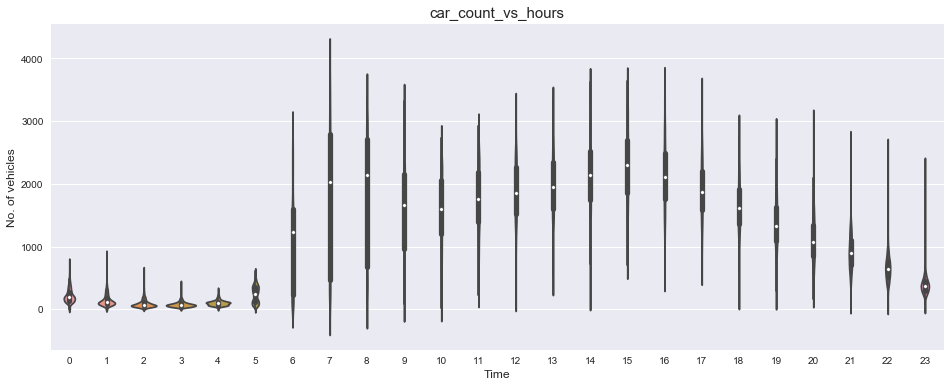

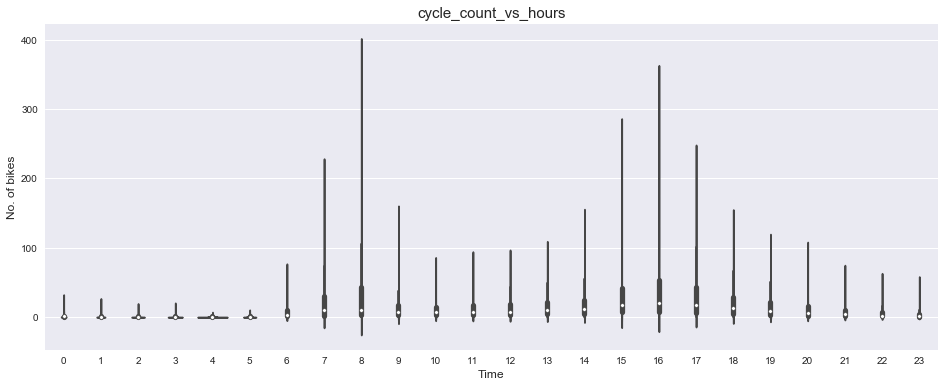

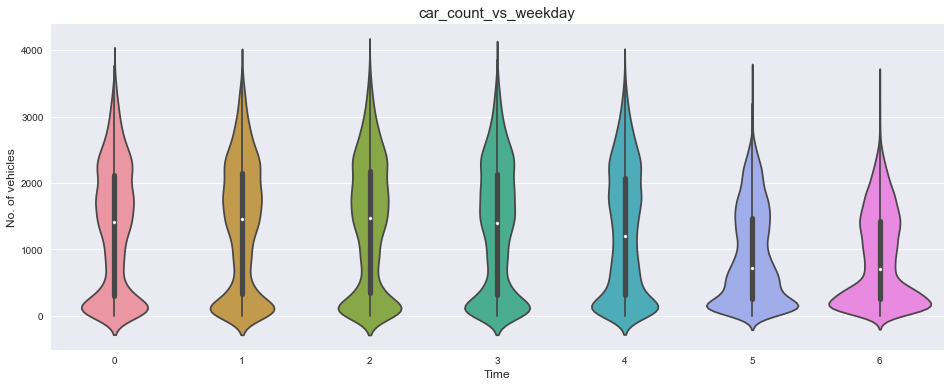

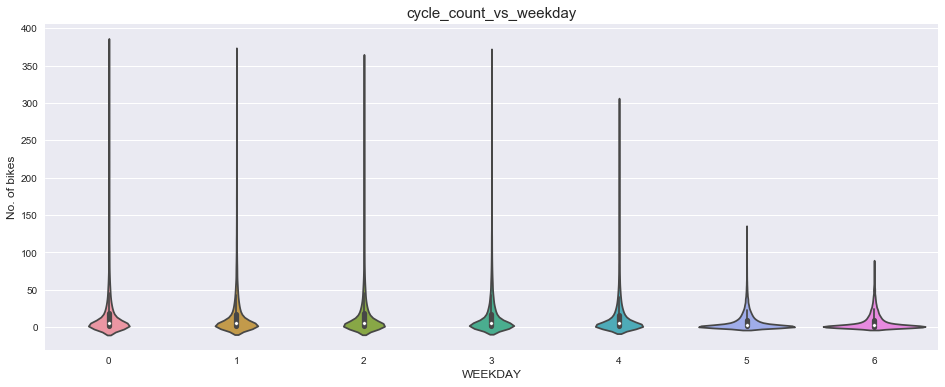

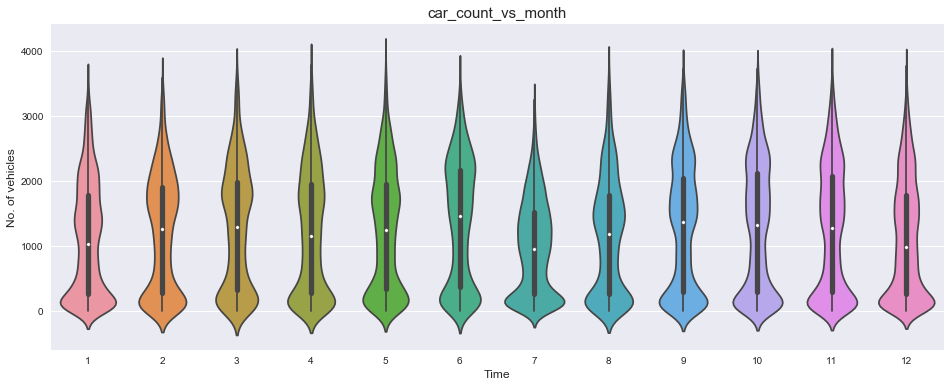

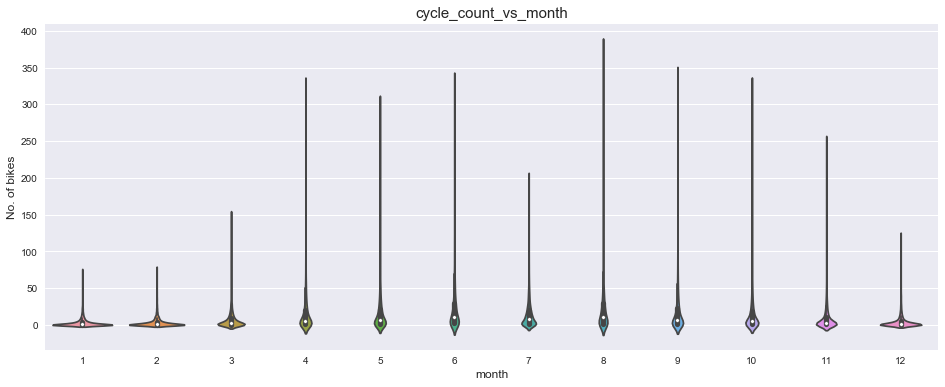

In [35]:
plt.figure(1)
#(ax1,ax2)= plt.subplots(nrows=2), plt.figure(figsize=(16,6))
#fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(S3000991.groupby("MONTH")["SUM"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="SUM",ascending=False)
ax1=sns.barplot(data=monthSorted,x="MONTH",y="SUM")#,order=sortOrder
ax1.set(xlabel='Month', ylabel='Average Count',title="Average Count By Month")
fig = ax1.get_figure()
fig.savefig('MonthSumoriginal.pdf',bbox_inches='tight')
#plt.show()

plt.figure(2)
hourAggregated = pd.DataFrame(S3000991.groupby(["HOUR","WEEKDAY"],sort=True)["SUM"].mean()).reset_index()
ax2=sns.pointplot(x=hourAggregated["HOUR"],y=hourAggregated["SUM"],hue=hourAggregated["WEEKDAY"], data=hourAggregated)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekday",label='big')
#mylabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#ax2.legend(labels=mylabels)
#plt.legend(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#for t, l in zip(ax2.legend.get_texts(), new_labels): t.set_text(l)
fig = ax2.get_figure()
fig.savefig('Weekhourcount.pdf',bbox_inches='tight')
#plt.show()

violinplot(car_met_clean_sensor_location,'HOUR','SUM','Time','No. of vehicles','car_count_vs_hours','car_count_vs_hours.pdf')
violinplot(cycle_met_clean_data,'HOUR','SUM','Time','No. of bikes','cycle_count_vs_hours','car_count_vs_hours.pdf')


violinplot(car_met_clean_sensor_location,'WEEKDAY','SUM','Time','No. of vehicles','car_count_vs_weekday','car_count_vs_weekday.pdf')
violinplot(cycle_met_clean_data,'WEEKDAY','SUM','WEEKDAY','No. of bikes','cycle_count_vs_weekday','cycle_count_vs_weekday.pdf')

violinplot(car_met_clean_sensor_location,'MONTH','SUM','Time','No. of vehicles','car_count_vs_month','car_count_vs_month.pdf')
violinplot(cycle_met_clean_data,'MONTH','SUM','month','No. of bikes','cycle_count_vs_month','cycle_count_vs_month.pdf')



In [144]:
#S300099.drop(['SENSOR_ID','DIRECTION','SUM','TIME','STATION_ID','HOUR','DIRECTION'],inplace=True,axis = 1)
#numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED','DTC','xHOUR','yHOUR','xdirection','ydirection']
#print(S300099.head())

**SPLIT TRAINING AND TEST DATA NEXT**

In [145]:
#S300099.reindex(np.random.permutation(S300099.index))
#S300099['HOUR']=S3000991['HOUR']

X_train, X_test, y_train, y_test = train_test_split(S300099,y2,test_size=0.2, random_state = 2)

#X_train=X_train.head(1000)
#X_test=X_test.head(1000)
#y_train=y_train[:1000]
#y_test=y_test[:1000]

#print(S300099.head())
#print(X_train.head())
#print(numeric_data_indices)
#print(categorical_data_indices)

In [146]:
print(transformer_list)

[('numeric_variables_processing', Pipeline(steps=[('selecting', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000000001D5D51E0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=True)), ('scaling', StandardScaler(copy=True, with_mean=0, with_std=True))])), ('categorical_variables_processing', Pipeline(steps=[('selecting', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000000001D5D5268>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=True)), ('hot_encoding', OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='ignore', n_values='auto', sparse=True))]))]


In [147]:
#plt.matshow(S300099.corr())


In [148]:
#S300099.plot(kind='scatter', x='Speedmps', y='SUM', figsize=(12,8))

FEATURE SCALING NEXT TO IMPROVE CONVERGENCE OF OPTIMIZER
http://scikit-learn.org/stable/modules/preprocessing.html
(Rescale data. Standardize data. Normalize data. Binarize data.)
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
Categorial : https://stackoverflow.com/questions/33976845/using-categorical-data-as-features-in-sklean-logisticregression

In [149]:
#X_train, X_test, y_train, y_test = train_test_split(X2norm,y2, test_size=0.2, random_state = 2)

In [150]:
def scoring(clf):
    scores = cross_val_score(clf, X_train, y_train, cv=15, n_jobs=1, scoring = 'neg_median_absolute_error')
    print (np.median(scores)*-1)

In [151]:
def hypertune(estimator,tuned_parameters,cv1,X_train,y_train):
    #print (estimator,tuned_parameters,cv1)
    clf = GridSearchCV(estimator,tuned_parameters,cv=cv1)
#,scoring    
    clf.fit(X_train,y_train)
    print("Coefficients based on fit:")
    print()
    #print("Coefficient: ", clf.best_estimator_.steps[-1][1].coef_)   
    print()
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The R2 scores are computed on the full evaluation set, and is.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(r2_score(y_true, y_pred))
    print()
    return clf

In [152]:
def plot_learning_curve(estimator, outfile,title, X, y, ylim=None, cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig(outfile,bbox_inches='tight')
    return plt

In [153]:
def plot_measured_prediction(title,y_test,predicted,out_file):
    fig, ax = plt.subplots()
    ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title(title)
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()
    return plt

**LINEAR REGRESSION**

Evaluating degree 1
Coefficients based on fit:


Best parameters set found on development set:

{}

Grid scores on development set:

0.712 (+/-0.004) for {}


The model is trained on the full development set.
The R2 scores are computed on the full evaluation set, and is.

0.711902635059



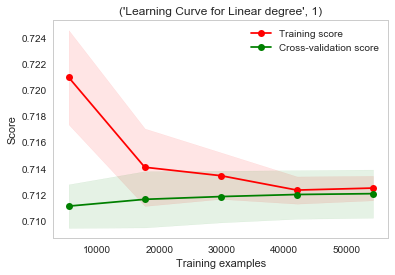

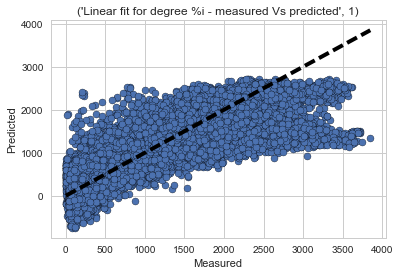

LR Daily error of trip count: 293.08203125
Evaluating degree 2
Coefficients based on fit:


Best parameters set found on development set:

{}

Grid scores on development set:

0.804 (+/-0.003) for {}


The model is trained on the full development set.
The R2 scores are computed on the full evaluation set, and is.

0.802165135413



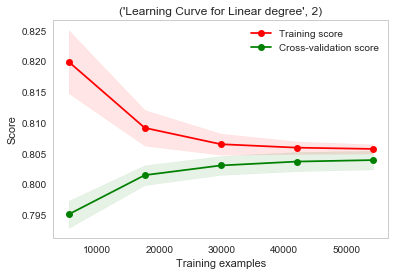

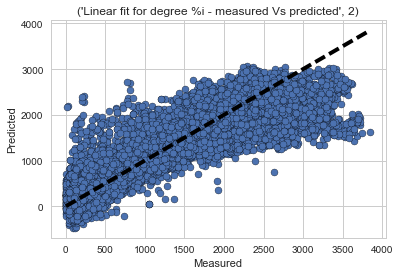

LR Daily error of trip count: 222.7578125


In [155]:
from sklearn import linear_model
degrees = [1,2]
for i in range(len(degrees)):
    print ("Evaluating degree",degrees[i])
    #ax = plt.subplot(1, len(degrees), i + 1)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression = linear_model.LinearRegression()
    estimpipeline = Pipeline([('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
                              ('make_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),  
                              ("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    param_grid = {
    #'model_fitting__alpha' : [5,1,0.5,100,200]
                }
    y_t=y_train.ravel()
    clf=hypertune(estimpipeline,param_grid,3,X_train,y_t)
    # Evaluate the models using crossvalidation
    #scores = cross_validation.cross_val_score(pipeline,
     #   X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    predictedlr = clf.best_estimator_.predict(X_test)
    #plt.plot(X_test,clf.predict(X_test,label="Model"))
    
    title1 = ("Learning Curve for Linear degree",degrees[i])
    out_file1=('LinearFitLC.pdf')
    
    plot_learning_curve(clf.best_estimator_,out_file1,title1,X_train,y_t, ylim=None,cv=3,n_jobs=1)
    
    
    title = ("Linear fit for degree %i - measured Vs predicted",degrees[i])
    out_file=('LinearFitPrediction.pdf')
    plot_measured_prediction(title,y_test,predictedlr,out_file)
    
    print ("LR Daily error of trip count:", median_absolute_error(y_test,predictedlr)) 
    #plt.scatter(X, y, label="Samples")
    #plt.xlabel("x")
    #plt.ylabel("y")
    #plt.xlim((0, 1))
    #plt.ylim((-2, 2))
    #plt.legend(loc="best")
    #plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
    #    degrees[i], -scores.mean(), scores.std()))

    
#plt.show()

#.....................................

#lr = linear_model.LinearRegression()
             
#estimator = pipeline.Pipeline(steps = [       
#   ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
#    ('model_fitting', lr)
#    ]
                              
#param_grid = {
    #'model_fitting__alpha' : [5,1,0.5,100,200]
#                }
                              
#clf=hypertune(estimpipeline,param_grid,3,X_train,y_train)                              

#print (clf.best_estimator_)
#y_predicted=clf.predict(X_test)

#lr.fit(X_train,y_train)
#print("Theta or weight coefficients calculated by SK-learn regression ",lr.coef_)
#print("Bias or intercept calculated by SK-learn regression ",lr.intercept_)
#lr_preds=lr.predict(X_test)  
#..............................................

#http://scikit-learn.org/0.17/auto_examples/model_selection/plot_underfitting_overfitting.html

#poly = PolynomialFeatures(degree=2)
#X_ = poly.fit_transform(X)
#predict_ = poly.fit_transform(predict)

#clf = linear_model.LinearRegression()
#clf.fit(X_, vector)
#print clf.predict(predict_)
#print ("LR Daily error of trip count:", median_absolute_error(y_test, lr_preds))

**PENALTY BASED REGRESSION - LASSO REGRESSION**

Coefficients based on fit:


Best parameters set found on development set:

{'model_fitting__alpha': 0.5}

Grid scores on development set:

0.712 (+/-0.004) for {'model_fitting__alpha': 0.5}
0.701 (+/-0.006) for {'model_fitting__alpha': 10}
0.520 (+/-0.005) for {'model_fitting__alpha': 200}


The model is trained on the full development set.
The R2 scores are computed on the full evaluation set, and is.

0.71185754911



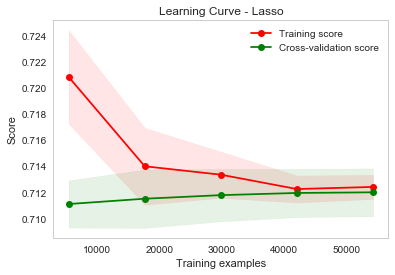

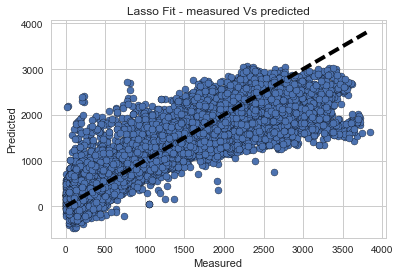

Lasso Daily error of trip count: 293.01393994
Coefficient:  [ -1.94749225e+01   2.52314313e+01  -1.34875609e+01   1.55612480e+01
  -1.73637172e+02  -2.68313040e+02  -6.69901682e+02  -1.04598484e+01
   3.58989574e-09   0.00000000e+00   2.80739764e+01   4.33677719e+01
   0.00000000e+00  -6.67841327e+01  -4.25791030e+02  -4.64449802e+02
  -0.00000000e+00  -4.75485318e+01  -4.37920841e+00  -5.12230315e+01
   0.00000000e+00   7.02939847e+01  -2.23481978e+02   4.55079665e+01
   1.13816066e+02   1.16094520e+02   9.39828211e+01  -5.44022354e+01]
final classifer Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [157]:
regressor = linear_model.Lasso(max_iter = 10000)

estimator = pipeline.Pipeline([  
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', regressor)
    ])
#estimator = pipeline.Pipeline(steps = [       
 #   ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
#  ('model_fitting', regressor)
   # ])
                             
param_grid = {
 'model_fitting__alpha' : [0.5,10,200]
}
#Param grid can be left blank

#rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
#grid_cv = GridSearchCV(estimator, parameters_grid,cv =3)
#grid_cv.fit(X_train,y_train)
#predicted = grid_cv.best_estimator_.predict(X_test)
#print("RMSLE: ", r2_score(y_test, predicted))
#print("MAE: ",  metrics.mean_absolute_error(y_test, predicted))

grid_cv=hypertune(estimator,param_grid,3,X_train,y_train)
#print (grid_cv.best_estimator_)

predicted = grid_cv.best_estimator_.predict(X_test)

title1 = ("Learning Curve - Lasso")
out_file1=('LassoFitLC.pdf')
plot_learning_curve(grid_cv.best_estimator_,out_file1,title1,X_train,y_train, ylim=None,cv=3,n_jobs=1)
    
    
title = ("Lasso Fit - measured Vs predicted")
out_file=('LassoFitPrediction.pdf')
plot_measured_prediction(title,y_test,predictedlr,out_file)

print ("Lasso Daily error of trip count:", median_absolute_error(y_test,predicted))


#print("Best params: ", grid_cv.best_params_)
print("Coefficient: ", grid_cv.best_estimator_.steps[-1][1].coef_)
final_pipeline_ingridCV = grid_cv.best_estimator_
final_classifier = final_pipeline_ingridCV.named_steps['model_fitting']
print('final classifer',final_classifier)
#print("fit",grid_cv.fit)


**TREE BASED REGRESSION - RANDOM FOREST, GRADIENT BOOST**

Coefficients based on fit:


Best parameters set found on development set:

{}

Grid scores on development set:

0.965 (+/-0.004) for {}


The model is trained on the full development set.
The R2 scores are computed on the full evaluation set, and is.

0.970129290033

Coefficients based on fit:


Best parameters set found on development set:

{}

Grid scores on development set:

0.979 (+/-0.002) for {}


The model is trained on the full development set.
The R2 scores are computed on the full evaluation set, and is.

0.979922146673

Coefficients based on fit:


Best parameters set found on development set:

{}

Grid scores on development set:

0.888 (+/-0.005) for {}


The model is trained on the full development set.
The R2 scores are computed on the full evaluation set, and is.

0.884322084309

Decision Tree Daily error of trip count: 39.9032690542


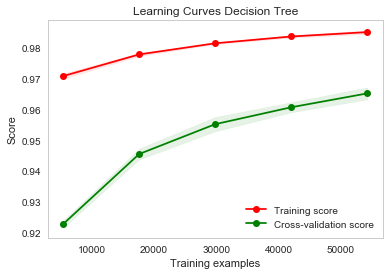

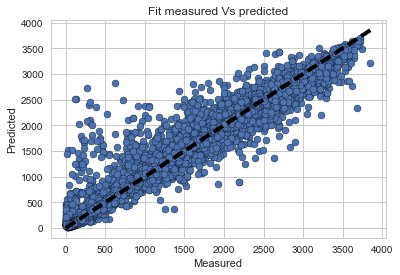

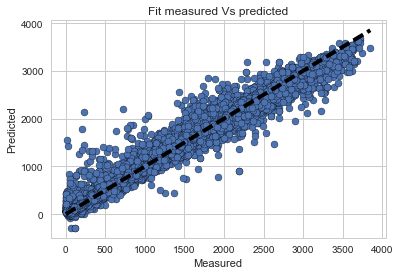

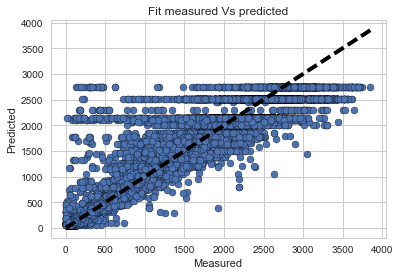

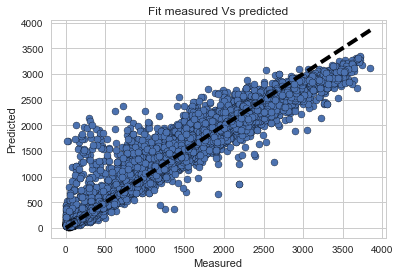

Ensemble Daily error of trip count: 37.6629934783
RF error of trip count: 39.9032690542
GBR Daily error of trip count: 43.196782643
DT Daily error of trip count: 91.993258427
Ensemble Daily error of trip count: 53.3251458634


In [158]:
rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 3,
                            random_state = 2)
#scoring(rfr)    

gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)
#scoring(gbr)

dtr = DecisionTreeRegressor(min_samples_leaf = 3,
                            max_depth = 8,
                            random_state = 2)
y_t=y_train.ravel()

estimatorrfr = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', rfr)
    ])
param_grid = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#'n_estimators': [50,100,10]
}

grid_cv=hypertune(estimatorrfr,param_grid,3,X_train,y_t)
#print (grid_cv.best_estimator_)


estimator2 = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('make_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),  
    ('model_fitting', gbr)
    ] )

#estimator2 = make_pipeline (pipeline.FeatureUnion(transformer_list=transformer_list),
#                           FunctionTransformer(lambda x: x.todense(), accept_sparse=True),
#                           ('model_fitting', gbr))

param_grid2 = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#    'n_estimators': [50,100,10]
}

grid_cv2=hypertune(estimator2,param_grid2,3,X_train,y_t)

predicted = grid_cv.best_estimator_.predict(X_test)
predicted2 = grid_cv2.best_estimator_.predict(X_test)

estimator3 = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', dtr)
    ] )
param_grid3 = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#    'max_depth': [6,7,8]
}

grid_cv3=hypertune(estimator3,param_grid3,3,X_train,y_t)

predicted = grid_cv.best_estimator_.predict(X_test)
predicted2 = grid_cv2.best_estimator_.predict(X_test)
predicted3 = grid_cv3.best_estimator_.predict(X_test)
finalpredicted = 0.33*predicted + 0.33*predicted2 + 0.33*predicted3

title = "Learning Curves Decision Tree"
out_file1=('RFFitLC.pdf')
plot_learning_curve(grid_cv.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)

print ("Decision Tree Daily error of trip count:", median_absolute_error(y_test,predicted))

title = "Fit measured Vs predicted"
out_file1=('RFFitPrediction.pdf')
plot_measured_prediction(title,y_test,predicted,out_file1)
out_file1=('GB.pdf')
plot_measured_prediction(title,y_test,predicted2,out_file1)
out_file1=('DT.pdf')
plot_measured_prediction(title,y_test,predicted3,out_file1)
out_file1=('Ensemble.pdf')
plot_measured_prediction(title,y_test,finalpredicted,out_file1)
#scoring(dtr)

#print("yt",y_t.shape)
rfr = rfr.fit(X_train, y_t)
gbr = gbr.fit(X_train, y_t)

rfr_preds = rfr.predict(X_test)
gbr_preds = gbr.predict(X_test)

#Weight the top models to find the best prediction
#final_preds = rfr_preds*0.32 + gbr_preds*0.38 + xgb_preds*0.3
final_preds = rfr_preds*0.5 + gbr_preds*0.5 
print ("Ensemble Daily error of trip count:", median_absolute_error(y_test,final_preds))
print ("RF error of trip count:", median_absolute_error(y_test,predicted))
print ("GBR Daily error of trip count:", median_absolute_error(y_test,predicted2))
print ("DT Daily error of trip count:", median_absolute_error(y_test,predicted3))
print ("Ensemble Daily error of trip count:", median_absolute_error(y_test,finalpredicted))

In [159]:
ypredicted_Tree = 0.5*predicted + 0.5*predicted2 
print ("Two best Ensemble Daily error of trip count:", median_absolute_error(y_test,ypredicted_Tree))

Two best Ensemble Daily error of trip count: 38.7279785966


**SUPPORT VECTOR MACHINE BASED REGRESSION**

Coefficients based on fit:


Best parameters set found on development set:

{'svra__C': 100, 'svra__gamma': 1}

Grid scores on development set:

0.041 (+/-0.001) for {'svra__C': 1, 'svra__gamma': 1}
0.001 (+/-0.000) for {'svra__C': 1, 'svra__gamma': 10}
0.000 (+/-0.000) for {'svra__C': 1, 'svra__gamma': 50}
0.338 (+/-0.004) for {'svra__C': 10, 'svra__gamma': 1}
0.014 (+/-0.000) for {'svra__C': 10, 'svra__gamma': 10}
0.005 (+/-0.000) for {'svra__C': 10, 'svra__gamma': 50}
0.849 (+/-0.008) for {'svra__C': 100, 'svra__gamma': 1}
0.130 (+/-0.001) for {'svra__C': 100, 'svra__gamma': 10}
0.053 (+/-0.001) for {'svra__C': 100, 'svra__gamma': 50}


The model is trained on the full development set.
The R2 scores are computed on the full evaluation set, and is.

0.891202063721

SVR Daily error of trip count: 83.0055825103


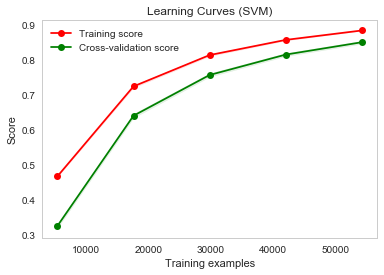

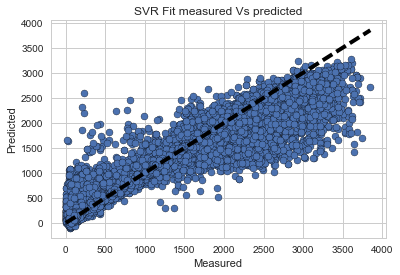

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [160]:
from sklearn.svm import SVR
svra=SVR(kernel='rbf',C=1e3, gamma=0.1)
param_grid={"svra__C":[1,10,100],"svra__gamma": [1,10,50]}
#tuned_parameters = [{'kernel': ['rbf'],'svra__C':[1, 10, 100, 1000]}]
#param_gridsv = [
 # {'svr__C': [1, 10, 100], 'kernel': ['linear']},
# {'C': [200,500,1000], 'gamma': [1,10,50], 'kernel': ['rbf']},
# ]
y_t=y_train.ravel()
#kernel='rbf', C=1e3, gamma=0.1)
estimatorsv = Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('svra',svra)
])
#print(estimatorsv.get_params().keys())
grid_cvsvr=hypertune(estimatorsv,param_grid,3,X_train,y_t)
#print (grid_cvsvr.best_estimator_)
y_predictedSVM=grid_cvsvr.predict(X_test)


#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
#y_rbf = svr_rbf.fit(X_train,y_train).predict(X_test)
#y_lin = svr_lin.fit(X_train,y_train).predict(X_test)
#y_poly = svr_poly.fit(X_train,y_train).predict(X_test)
#clf.best_estimator_
#print ("SVR RBF Daily error of trip count:", median_absolute_error(y_test,y_rbf))
#print ("SVR Lin Daily error of trip count:", median_absolute_error(y_test,y_lin))
#print ("SVR Poly Daily error of trip count:", median_absolute_error(y_test,y_poly))  
#print(y_test.shape)
#print(y_rbf.shape)

title = "Learning Curves (SVM)"
out_file1=('SVMLC.pdf')
plot_learning_curve(grid_cvsvr.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)


print ("SVR Daily error of trip count:", median_absolute_error(y_test,grid_cvsvr.predict(X_test)))
title = "SVR Fit measured Vs predicted"
out_file2=('SVMFit.pdf')
plot_measured_prediction(title,y_test,y_predictedSVM,out_file2)
                              
#plt.figure()
#plt.title(title)
#plt.plot(y_predicted,y_test,'o-', color="r",
#             label="Prediction")
#plt.xlabel("Predicted")
#plt.ylabel("Observed")

In [161]:
print ("SVR Daily error of trip count:", median_absolute_error(y_test,grid_cvsvr.predict(X_test)))


SVR Daily error of trip count: 83.0055825103


Case 1. Bias Error. If the training score and the validation score are both low, the estimator will be underfitting. If both the validation score and the training score converge to a value that is too low with increasing size of the training set. We will not benefit much from more training data. We will probably have to use an estimator or a parametrization of the current estimator that can learn more complex concepts (i.e. has a lower bias).
Case 2. Variance Error - Overfitting problem. High validation error as compared to training error.  If the training score is much greater than the validation score for the maximum number of training samples, then adding more training samples will most likely increase generalization.
Regularization - alpha values 1e-05 to 1000 - Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary

**NEURAL NETWORK BASED REGRESSION**

Coefficients based on fit:


Best parameters set found on development set:

{'reg__activation': 'relu', 'reg__alpha': 0.1, 'reg__hidden_layer_sizes': (5, 35)}

Grid scores on development set:

0.720 (+/-0.047) for {'reg__activation': 'relu', 'reg__alpha': 0.1, 'reg__hidden_layer_sizes': (5, 35)}
0.638 (+/-0.086) for {'reg__activation': 'relu', 'reg__alpha': 0.1, 'reg__hidden_layer_sizes': (2, 25)}
0.697 (+/-0.053) for {'reg__activation': 'relu', 'reg__alpha': 10, 'reg__hidden_layer_sizes': (5, 35)}
0.638 (+/-0.086) for {'reg__activation': 'relu', 'reg__alpha': 10, 'reg__hidden_layer_sizes': (2, 25)}


The model is trained on the full development set.
The R2 scores are computed on the full evaluation set, and is.

0.748345612145

Pipeline(steps=[('feature_processing', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_variables_processing', Pipeline(steps=[('selecting', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000000001D5D51E0>, inv_kw_args=

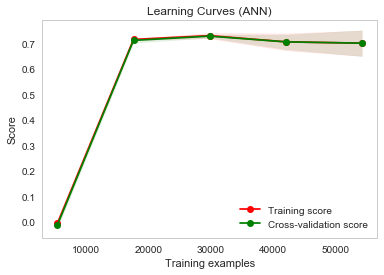

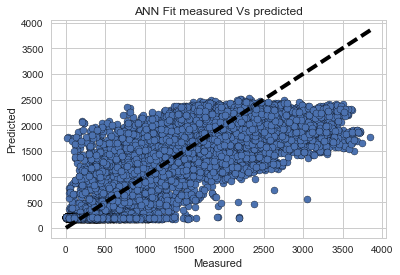

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [162]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(1000,50),activation='logistic',solver='adam',alpha=0.001,
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=5000, shuffle=True,
              random_state=10, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08) 
param_grids = {'reg__alpha': [0.1,10],'reg__hidden_layer_sizes': [(5,35),(2,25)],'reg__activation':['relu']}
 #  {'reg__hidden_layer_sizes': [(400,25),(100,25),(2,25)]},
y_t=y_train.ravel()
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('reg',reg)
    ])
#clf1 = GridSearchCV(reg,param_grids,cv=3)
#clf1.fit(X_train,y_train)

#, 'hidden_layer_sizes': [(400,),(100,),(2,)]
#,'activation': ['identity’,‘logistic’,‘relu’]
#solver='adam',
#10.0 ** -np.arange(1, 7)
#hidden_layer_sizes= ,alpha=
#{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
clf1=hypertune(estimator,param_grids,3,X_train,y_t)
print (clf1.best_estimator_)
y_predicted_ANN=clf1.predict(X_test)
#reg = reg.fit(X_train,y_train)
#scoring(reg)
#y_predicted= reg.predict(X_test)
#,'activation':['identity','logistic','relu']
    
title = "Learning Curves (ANN)"
out_file1=('ANNLC.pdf')
plot_learning_curve(clf1.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
print ("ANN Daily error of trip count:", median_absolute_error(y_test,y_predicted_ANN))
                              
title = "ANN Fit measured Vs predicted"
out_file2=('ANNFit.pdf')
plot_measured_prediction(title,y_test,y_predicted_ANN,out_file2)
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.scatter(X_train[:,1],y_train, s=10, c='b', marker="s", label='real')
#ax1.scatter(X_test[:,1],y_ann, s=10, c='r', marker="o", label='NN Prediction')
#plt.show()
#len(reg.coefs_)
#len(reg.coefs_[0]) #weight matrix at index i represents the weights between layer i and layer i+1.
#len(reg.intercepts_[0]) #here the vector at index i represents the bias values added to layer i+1.

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
m,input_layer_size=X.shape
hidden_layer_size = input_layer_size   
ANN_classifier = Sequential()
ANN_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_layer_size))
ANN_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
ANN_classifier.add(Dense(units = 1, kernel_initializer = 'normal'))
ANN_classifier.compile(loss='mean_squared_error', optimizer='adam')
start_time = time.time()
history=ANN_classifier.fit(X_train, y_train, batch_size = 1000, epochs = 400,verbose=0)
pred_ANN_train = ANN_classifier.predict(X_train)
pred_ANN_test   = ANN_classifier.predict(X_test)
print("Execution time in seconds ", (time.time() - start_time))
print("Mean squared error: ", np.mean((pred_ANN_train - y_train.values.reshape(-1,1)) ** 2))
print("Mean squared error: ", np.mean((pred_ANN_test - y_test.values.reshape(-1,1)) ** 2))

#def RF(X_train,X_test,y_train,y_test,max_depth):
#    from sklearn.ensemble import RandomForestRegressor
#    max_depth = max_depth
#    clf = RandomForestRegressor(max_depth=max_depth, random_state=2)
#    clf.fit(X_train, y_train)    
#    print("MSE on test data",mean_squared_error(predict(clf,X_test),y_test))
#    print_error(predict(clf,X_train),predict(clf,X_test),y_train,y_test,'RF')
#    return clf

**PLOT FEATURE IMPORTANCE USING TREE BASED REGRESSION**

[ 0.0117799   0.01994892  0.00203238  0.01340953  0.10288518  0.02750114
  0.06210808  0.18221059  0.57055955  0.00369959  0.00386514]
(81328, 11)
Feature ranking:
0 WINDSPEED
1 TempC
2 Pptmm
3 Humidpercen
4 WEEKDAY
5 MONTH
6 DTC
7 xHOUR
8 yHOUR
9 xdirection
10 ydirection


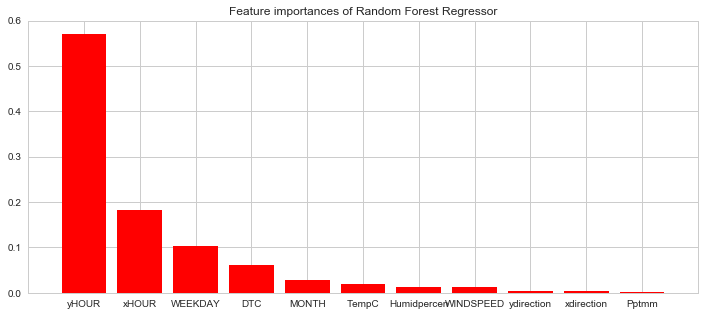

In [163]:
print(estimatorrfr.named_steps["model_fitting"].feature_importances_)
print(X_train.shape)
def plot_importances(model, model_name):
#    print(grid_search.best_estimator_.named_steps["clf"].feature_importances_)
    importances=model.named_steps["model_fitting"].feature_importances_
#    print('importance',importances)
# importances = model.feature_importances_
#   std = np.std([model.feature_importances_ for feature in model.estimators_],
    std = np.std([model.named_steps["model_fitting"].feature_importances_ for feature in model.named_steps["model_fitting"].estimators_],axis=0)
    indices = np.argsort(importances)[::-1]    

    # Plot the feature importances of the forest
    plt.figure(figsize = (12,5))
    plt.title("Feature importances of " + model_name)
    #del X_train['HOUR']
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
    #print( X_train.columns[indices])
    plt.xticks(range(X_train.shape[1]),X_train.columns[indices])
    plt.xlim([-1, X_train.shape[1]])
    plt.savefig('importance.pdf',bbox_inches='tight')
    plt.show()
#print(estimatorrfr.named_steps["feature_processing"])  
print("Feature ranking:")

i = 0
for feature in X_train:
    print (i, feature)
    i += 1
    
plot_importances(estimatorrfr, "Random Forest Regressor")
#answer 2,5,1,3,7
#leat is 6
#index=[2,3,4,9,10,11,12,13]
#important - 4 (starthour),11(temperature),3(day),9,13
#least 12(precipitation)
#plot_importances(estimator2, "Gradient Boosting Regressor")
#gbr

In [164]:
#ClassificationErrorAnalysis
#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))

20333


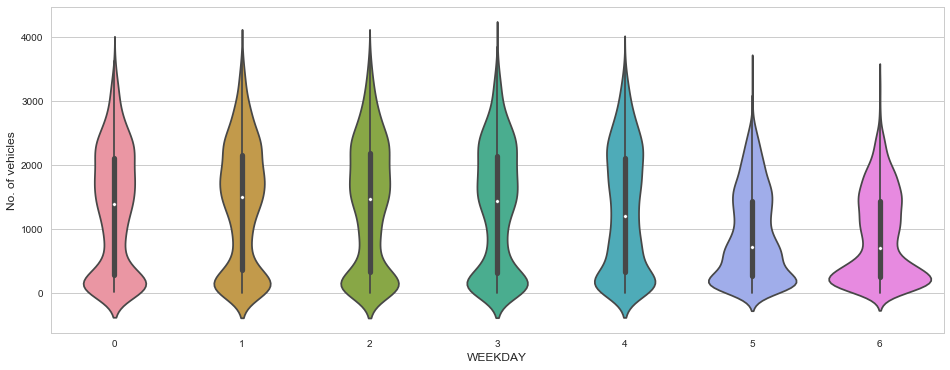

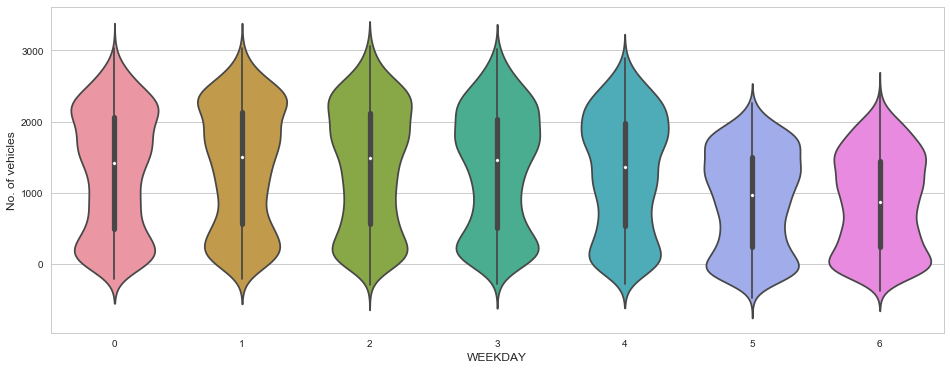

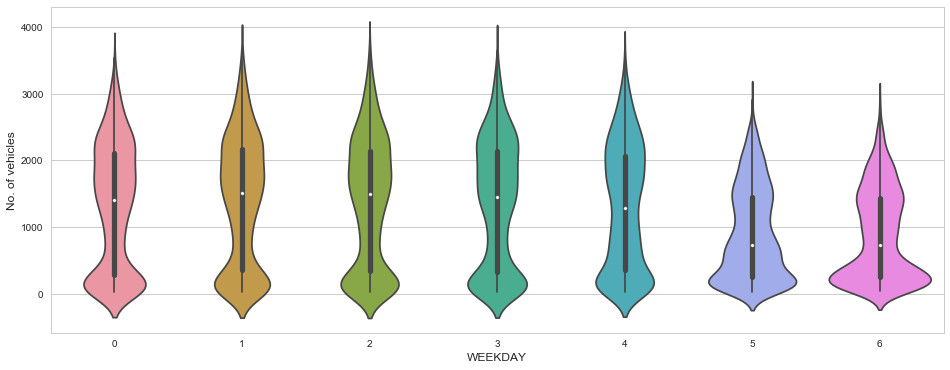

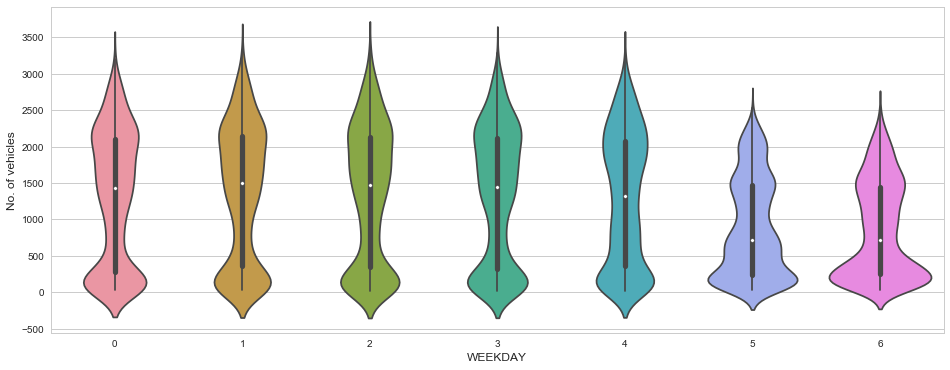

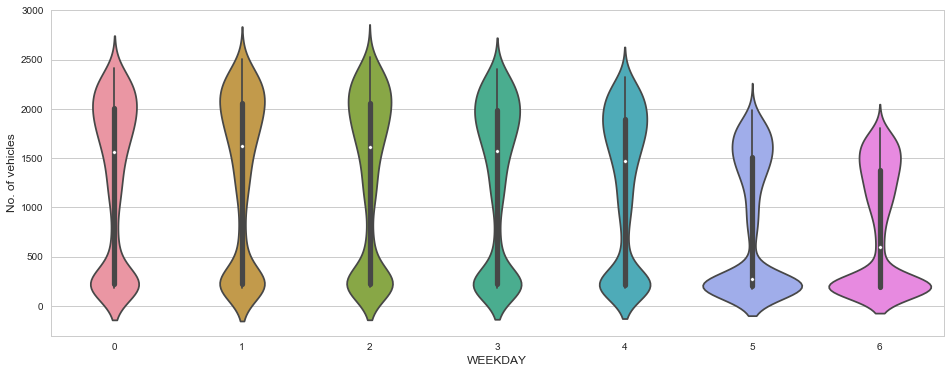

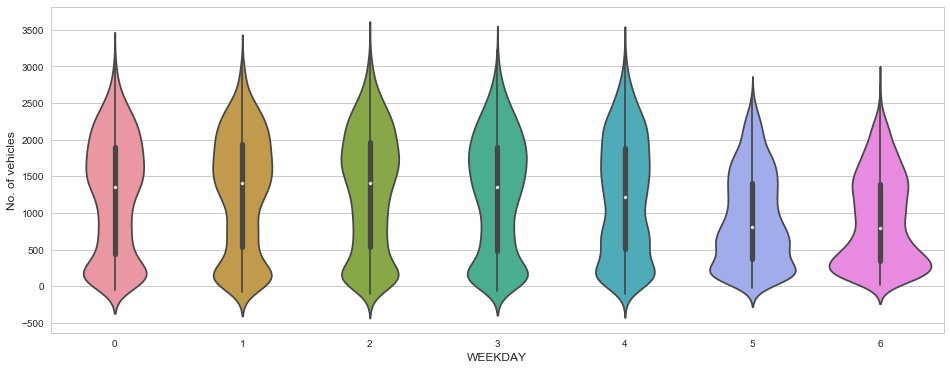

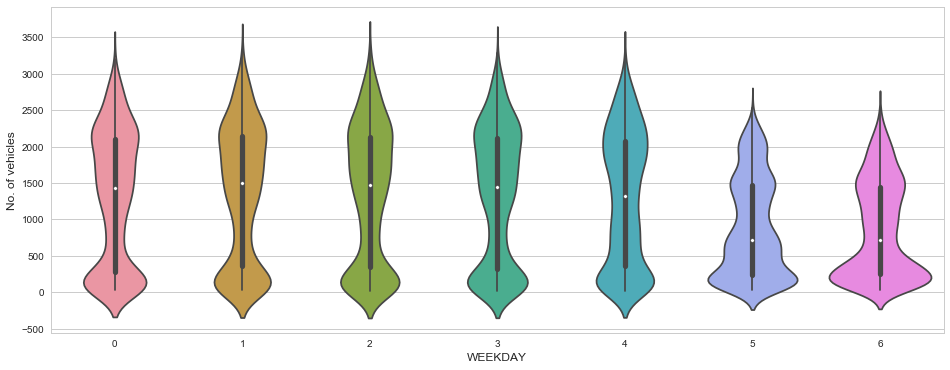

In [165]:
data2=X_test.copy()
print(len(predictedlr))
data2['SUM']=y_test
data2['SUM_LR']=predictedlr
data2['SUM_RF']=predicted
data2['SUM_DTR']=finalpredicted
data2['SUM_ANN']=y_predicted_ANN
data2['SUM_SVM']=y_predictedSVM
violinplot(data2,'WEEKDAY','SUM','WEEKDAY','No. of vehicles','','count_vs_hours.pdf')
violinplot(data2,'WEEKDAY','SUM_LR','WEEKDAY','No. of vehicles','','LR_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_RF','WEEKDAY','No. of vehicles','','RF_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_DTR','WEEKDAY','No. of vehicles','','DTR_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_ANN','WEEKDAY','No. of vehicles','','ANN_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_SVM','WEEKDAY','No. of vehicles','','SVM_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_DTR','WEEKDAY','No. of vehicles','','DTR_prediction_violin.pdf')


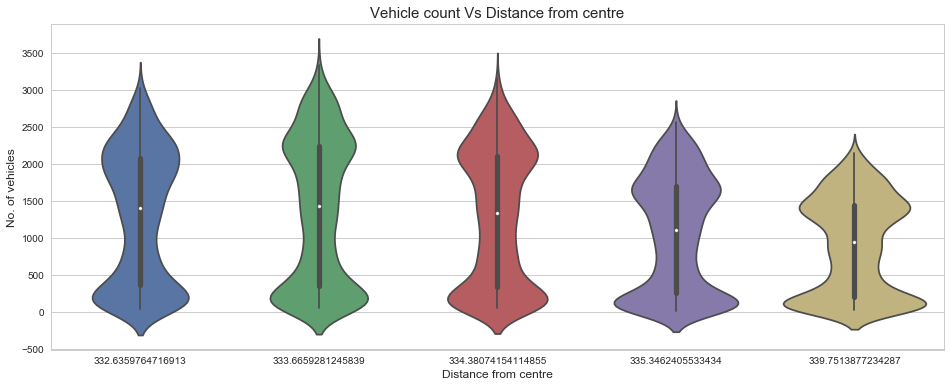

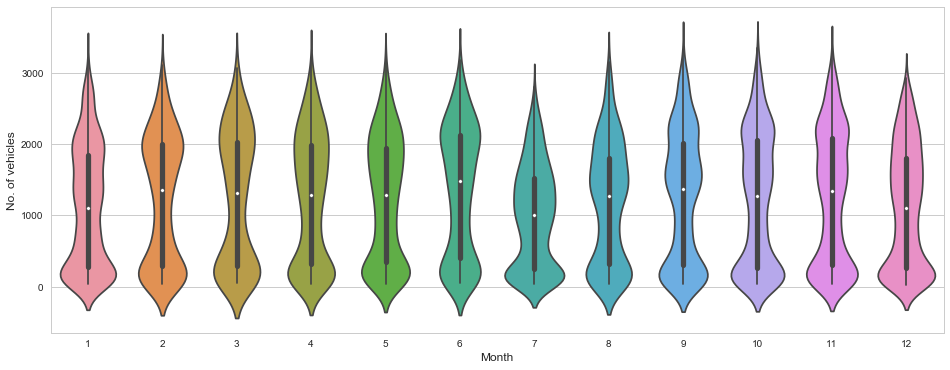

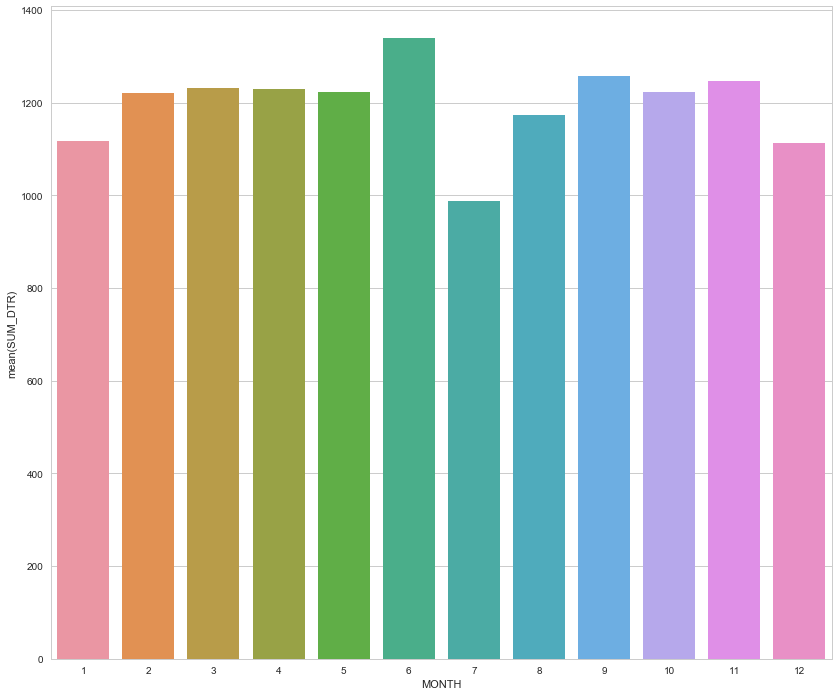

In [166]:
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=18
sns.set_style("whitegrid")
#vpdct=sns.violinplot(x='DTC',y='SUM_DTR',data=data2)
vpdct=violinplot(data2,'DTC','SUM_DTR','Distance from centre','No. of vehicles','Vehicle count Vs Distance from centre','DTR_DTC_prediction_violin.pdf')
#vpdct=sns.swarmplot(x='DTC',y='SUM_DTR',data=data2)
#numeric_data_columns = [,'Pptmm','Humidpercen','WINDSPEED','DTC','xHOUR','yHOUR','xdirection','ydirection']
#violinplot(data2,'TempC','SUM_DTR','Temperature','No. of vehicles','','DTR_DTC_prediction_violin.pdf')
#groupby_regiment = data2['TempC'].groupby(data2['MONTH'])
#print(len(groupby_regiment))
#ax = sns.violin(groupby_regiment,data2['SUM_DTR'], bw=0.05)
#violinplot(data2,'TempC','SUM_DTR','Temperature','No. of vehicles','','DTR_DTC_prediction_violin.pdf')
violinplot(data2,'MONTH','SUM_DTR','Month','No. of vehicles','','DTR_Month_prediction_violin.pdf')

#col_order = np.sort(data_in[key].unique()).tolist()
 #   plt.figure(figsize=(16,6))
#  sns.violinplot(x=key, y=target, data=data_in, order=col_order)
    #plt.ylim([-100,1000])
#    plt.xlabel(xlabel, fontsize=12)
#    plt.ylabel(ylabel, fontsize=12)
#    plt.title(title, fontsize=15)
    #plt.show()
#    plt.savefig(out_file,bbox_inches='tight')
#    plt.show()

#violinplot(data2,'WINDSPEED','SUM_DTR','HOUR','No. of vehicles','','DTR_Month_prediction_violin.pdf')
monthAggregated = pd.DataFrame(data2.groupby("MONTH")["SUM_DTR"].mean()).reset_index()
#print(monthAggregated)
monthSorted = monthAggregated.sort_values(by="SUM_DTR",ascending=False)
sns.barplot(data=monthSorted,x="MONTH",y="SUM_DTR")



count    20333.000000
mean        77.504500
std         17.344122
min         20.000000
25%         67.000000
50%         82.000000
75%         92.000000
max        100.000000
Name: Humidpercen, dtype: float64
                 SUM_DTR
Humidpercen             
(10, 20]     1857.506869
(20, 30]     1970.035578
(30, 40]     1870.269911
(40, 50]     1557.778172
(50, 60]     1383.268494
(60, 70]     1261.562251
(70, 80]     1185.220397
(80, 90]     1098.794788


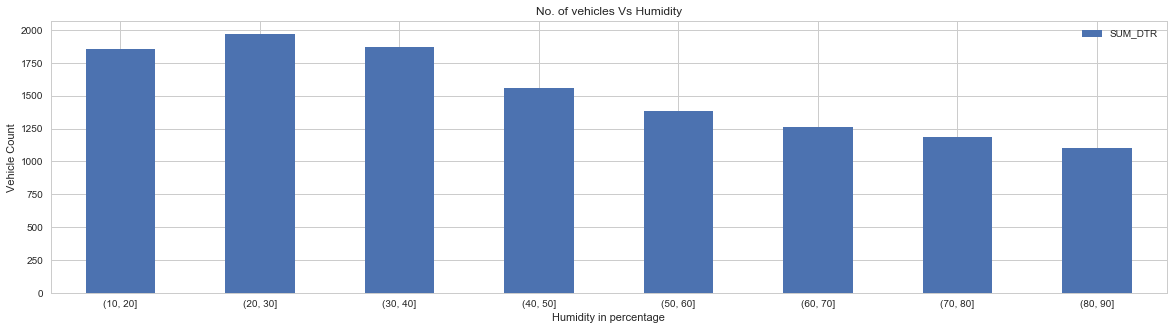

In [167]:
print(data2["Humidpercen"].describe())
HMAggregated=pd.DataFrame(data2.groupby(pd.cut(data2["Humidpercen"], np.arange(0,100,10)))["SUM_DTR"].mean())
HMAggregated=HMAggregated.dropna(axis=0, how='any')
print(HMAggregated)
ax=HMAggregated.plot.bar(rot=0,figsize=(20,5),title='No. of vehicles Vs Humidity')
ax.set_xlabel("Humidity in percentage")
ax.set_ylabel("Vehicle Count")
fig = ax.get_figure()
fig.savefig('Humidinfluence.pdf',bbox_inches='tight')


#sns.barplot(data=WSAggregated,x="WINDSPEED",y="SUM_DTR")


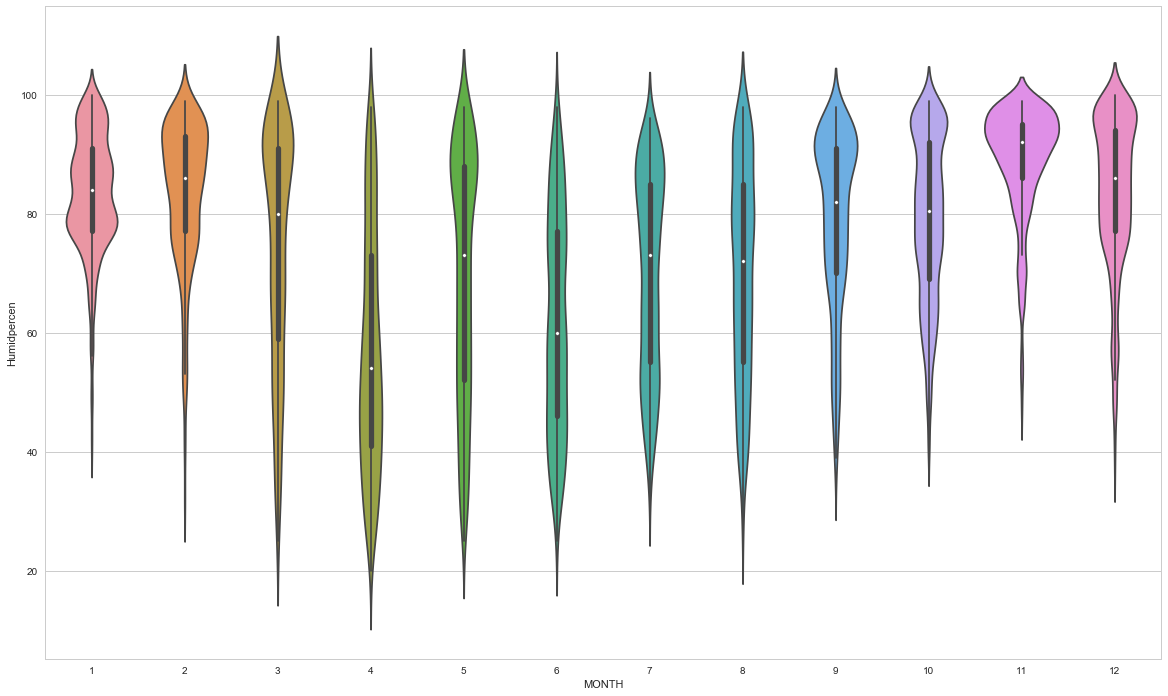

In [168]:
plt.rcParams['figure.figsize']=(20,12)
plt.rcParams['font.size']=18
g=sns.violinplot(x='MONTH',y='Humidpercen',data=data2)

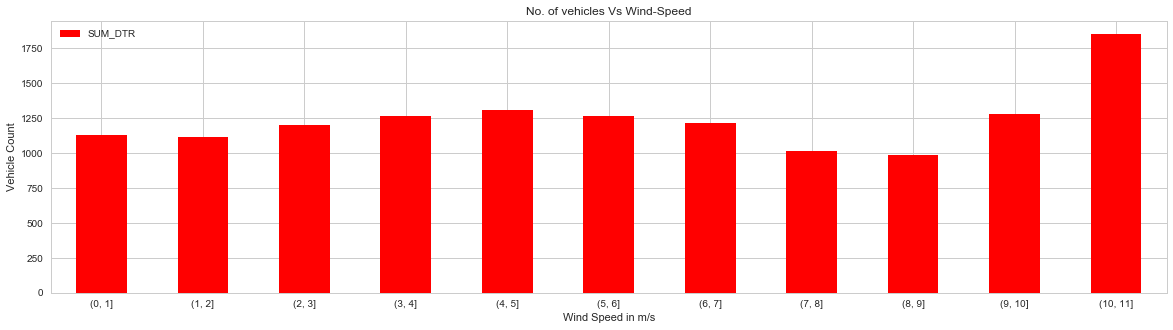

In [169]:
WSAggregated = pd.DataFrame(data2.groupby(pd.cut(data2["WINDSPEED"], np.arange(0,15,1)))["SUM_DTR"].mean())
WSAggregated=WSAggregated.dropna(axis=0, how='any')
ax=WSAggregated.plot.bar(rot=0,figsize=(20,5),title='No. of vehicles Vs Wind-Speed',colormap='hsv')
ax.set_xlabel("Wind Speed in m/s")
ax.set_ylabel("Vehicle Count")
fig = ax.get_figure()
fig.savefig('Windinfluence.pdf',bbox_inches='tight')


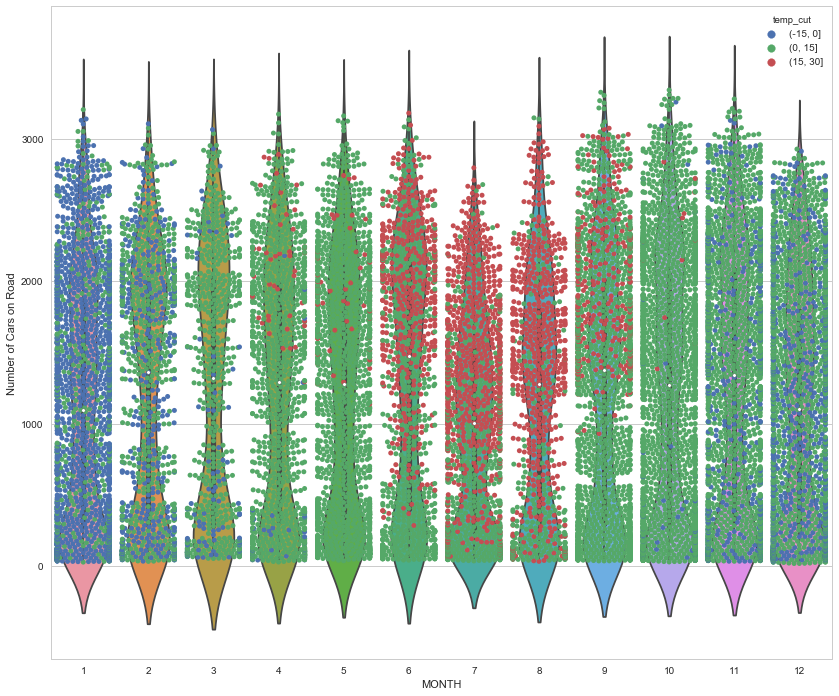

In [170]:
data2['temp_cut']=pd.cut(data2.TempC,[-15,0,15,30])  
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=18
sns.set_style("whitegrid")
g=sns.swarmplot(x='MONTH',y='SUM_DTR',hue='temp_cut',data=data2)
g=sns.violinplot(x='MONTH',y='SUM_DTR',data=data2)
g.set(xlabel="MONTH", ylabel="Number of Cars on Road")
plt.savefig('Monthinfluence.pdf',bbox_inches='tight')



(20333, 12)


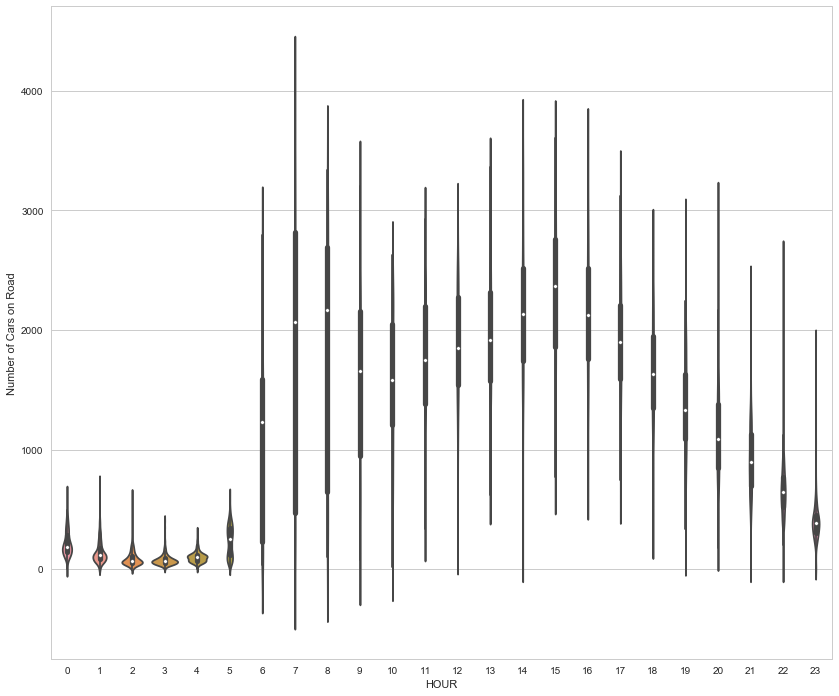

In [171]:
S300099['HOUR']=S3000991['HOUR']
X_train, X_test, y_train, y_test = train_test_split(S300099,y2,test_size=0.2, random_state = 2)
data2=X_test.copy()
print(data2.shape)
data2['SUM_DTR']=y_test
data2['temp_cut']=pd.cut(data2.TempC,[-15,0,15,30])  
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=18
sns.set_style("whitegrid")
#g=sns.swarmplot(x='HOUR',y='SUM_DTR',hue='temp_cut',data=data2)
g=sns.violinplot(x='HOUR',y='SUM_DTR',data=data2)
g.set(xlabel="HOUR", ylabel="Number of Cars on Road")
plt.savefig('HOURinfluence.pdf',bbox_inches='tight')


car_data.hist('TEMP',weights=car_data['SUM'],figsize=(16,6))
plt.xlabel("Temperature (C)")
plt.ylabel("No. of vehicles")
plt.title('')
plt.savefig('cars_hist_count_vs_temp.pdf',bbox_inches='tight')
plt.show()

cycle_data.hist('TEMP',weights=cycle_data['SUM'],figsize=(16,6))
plt.xlabel("Temperature (C)")
plt.ylabel("No. of bikes")
plt.title('')
plt.savefig('bikes_hist_count_vs_temp.pdf',bbox_inches='tight')
plt.show()

car_data.hist('WIND_MAG',weights=car_data['SUM'],figsize=(16,6))
plt.xlabel("Wind (mph)")
plt.ylabel("No. of vehicles")
plt.title('')
plt.savefig('cars_hist_count_vs_wind.pdf',bbox_inches='tight')
plt.show()

cycle_data.hist('WIND_MAG',weights=cycle_data['SUM'],figsize=(16,6))
plt.xlabel("Wind (mph)")
plt.ylabel("No. of bikes")
plt.title('')
plt.savefig('bikes_hist_count_vs_wind.pdf',bbox_inches='tight')
plt.show()